In [58]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string
stemmer=nltk.SnowballStemmer("english")
import re
import warnings
warnings.filterwarnings("ignore")

In [59]:
mydata=pd.read_csv(r"C:\Users\Dell\Desktop\ML-programing\dataset\NLP-DATA-main\NLP-DATA-main\twitter.csv")

In [60]:
mydata

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [61]:
mydata.head(20)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [62]:
mydata["target"]=mydata["class"].map({0: "hate speech",1:"hate speech",2:"No hate and offensive"})

In [63]:
mydata

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,target
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No hate and offensive
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,hate speech
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,hate speech
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,hate speech
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,hate speech
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,hate speech
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",No hate and offensive
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,hate speech
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,hate speech


In [64]:
mydata.shape

(24783, 8)

In [65]:
data_hate_speech=mydata[["tweet","target"]]

In [66]:
data_hate_speech

,tweet,target
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate and offensive
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,hate speech
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,hate speech
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,hate speech
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,hate speech
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,hate speech
24779,"you've gone and broke the wrong heart baby, an...",No hate and offensive
24780,young buck wanna eat!!.. dat nigguh like I ain...,hate speech
24781,youu got wild bitches tellin you lies,hate speech


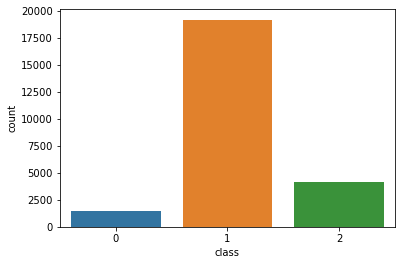

In [67]:
sb.countplot(x="class",data=mydata)
plt.show()

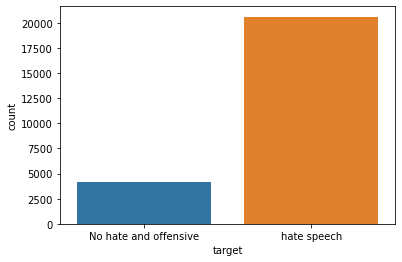

In [68]:
sb.countplot(x="target",data=data_hate_speech)
plt.show()

In [69]:
data_hate_speech.head(30)

,tweet,target
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate and offensive
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,hate speech
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,hate speech
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,hate speech
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,hate speech
5,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",hate speech
6,"!!!!!!""@__BrighterDays: I can not just sit up ...",hate speech
7,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,hate speech
8,""" &amp; you might not get ya bitch back &amp; ...",hate speech
9,""" @rhythmixx_ :hobbies include: fighting Maria...",hate speech


### raw tweet

In [70]:
tweet_raw=np.array(data_hate_speech["tweet"])
tweet_raw_token=word_tokenize(tweet_raw[0])
tweet_raw_token

['!',
 '!',
 '!',
 'RT',
 '@',
 'mayasolovely',
 ':',
 'As',
 'a',
 'woman',
 'you',
 'should',
 "n't",
 'complain',
 'about',
 'cleaning',
 'up',
 'your',
 'house',
 '.',
 '&',
 'amp',
 ';',
 'as',
 'a',
 'man',
 'you',
 'should',
 'always',
 'take',
 'the',
 'trash',
 'out',
 '...']

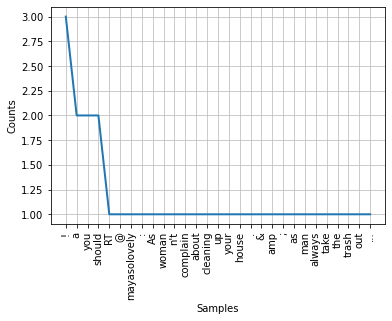

In [71]:
tweet_raw_token_freq=FreqDist(tweet_raw_token)
tweet_raw_token_freq.plot()
plt.show()

## Text cleanup

In [72]:
stop_words_list=stopwords.words("english")

In [73]:
stop_words_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [74]:
len(stop_words_list)

179

In [84]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<,*?>+','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)
    text = [ word for word in text.split(' ') if word not in stop_words_list]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

In [85]:
data_hate_speech["clean_tweet"]=data_hate_speech["tweet"].apply(clean)

In [86]:
data_hate_speech

,tweet,target,clean_tweet
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate and offensive,rt mayasolov woman shouldnt complain clean ho...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,hate speech,rt boy dat coldtyga dwn bad cuffin dat hoe ...
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,hate speech,rt urkindofbrand dawg rt ever fuck bitch sta...
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,hate speech,rt cganderson vivabas look like tranni
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,hate speech,rt shenikarobert shit hear might true might f...
...,...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,hate speech,yous muthafin lie coreyemanuel right tl tras...
24779,"you've gone and broke the wrong heart baby, an...",No hate and offensive,youv gone broke wrong heart babi drove redneck...
24780,young buck wanna eat!!.. dat nigguh like I ain...,hate speech,young buck wanna eat dat nigguh like aint fuck...
24781,youu got wild bitches tellin you lies,hate speech,youu got wild bitch tellin lie


### TFIDF vectorization

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [92]:
x_tweet=np.array(data_hate_speech["clean_tweet"])
y_target=np.array(data_hate_speech["target"])

In [93]:
len(np.unique(x_tweet))

24586

In [101]:
tf_idf_vector=TfidfVectorizer(use_idf=True,ngram_range=(2,2))
xvector=tf_idf_vector.fit_transform(x_tweet)

In [102]:
xvector

<24783x124694 sparse matrix of type '<class 'numpy.float64'>'
	with 179864 stored elements in Compressed Sparse Row format>

In [103]:
tf_idf_vector.get_feature_names()

['aa class',
 'aa lol',
 'aaaaaaaaand begin',
 'aaahhhhh internet',
 'aahahah fuck',
 'aaliyah curv',
 'aaliyahhhm knowww',
 'aaliyahhlove yu',
 'aamaadmiparti mix',
 'aampt ackin',
 'aan de',
 'aap maoist',
 'aap rocki',
 'aap shortsaid',
 'aaron hernandez',
 'aaron weak',
 'aaroncart push',
 'aaronkeplin shut',
 'aaronmacgrud stuff',
 'aaronthegoat bitch',
 'aaronworth carolcnn',
 'aaronworth corrcomm',
 'aaryn bitch',
 'aaryneliza im',
 'aaryneliza poor',
 'aarynelizagri cri',
 'aasthaxoxo oh',
 'ab anoth',
 'ab nomo',
 'ab pussi',
 'ab start',
 'ab ya',
 'abandonado en',
 'abartick bitch',
 'abbey oh',
 'abbeygoldd fuck',
 'abbeykirkland two',
 'abbeykuck whoop',
 'abbi doesnt',
 'abc cnn',
 'abc right',
 'abc scottddolan',
 'abc time',
 'abcrispyyandi laugh',
 'abdashcol natalieschroy',
 'abdelka te',
 'abduct link',
 'abdullah beat',
 'abdullahomar come',
 'abdurahman al',
 'abe gonna',
 'abe look',
 'abel yrs',
 'abellaxxx im',
 'abelsmasochist your',
 'aberdeen photobomb',
 'ab

In [104]:
xvector.shape

(24783, 124694)

###  splitting the data into test data and train data

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
xtrain,xtest,ytrain,ytest= train_test_split(xvector,y_target,test_size=.30,random_state=100)

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
lr_trainer=LogisticRegression()
lr_learner=lr_trainer.fit(xtrain,ytrain)

### Testing

In [117]:
input_text=[" nice girls bad make me get naughty Bad yello hoe real nice body Down south chick like em real thick"]

In [118]:
model_input=tf_idf_vector.transform(input_text).toarray()

In [121]:
lr_learner.predict(model_input)
lr_learner.predict_proba(model_input)

array([[0.1566844, 0.8433156]])

### Testing accuracy

In [122]:
ya=ytest
yp=lr_learner.predict(xtest)

In [123]:
from sklearn.metrics import accuracy_score

In [124]:
accuracy_score(ya,yp)*100

83.03967720242098